In [41]:
import sys
import os
# Get current directory
current_dir = os.getcwd()
# Get parent directory
parent_dir = os.path.join(current_dir, '..')
# Append parent directory to sys.path
sys.path.append(parent_dir)



In [42]:
from wordcloud import WordCloud
from dotenv import load_dotenv
load_dotenv()
import pandas as pd
import os
import pathlib
import gensim
import numpy as np
from gensim import models,corpora
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from dotenv import load_dotenv
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [43]:
homepath = os.getenv('LOCAL_ENV')
# /Users/mylene/BachelorsProject/Venue-Accessibility-Google-Reviews/data/processed/aspect_classification_data/euans_reviews.csv
euans_path = homepath + '/data/processed/aspect_classification_data/processed_euans_reviews.csv'
# google_path = homepath + 'data/processed/aspect_classification_data/processed_google_reviews.csv'
euans_data = pd.read_csv(euans_path)
# google_data = pd.read_csv(google_path)

# Exploratory Data Analysis

### Firstly, I have created some visualisations linked to the Euans Guide data that will be used for training to understand the propotions of the features that we will be focusing on in the pipeline.


In [44]:
wordcloud = WordCloud(background_color='white', max_words=1000, contour_width=3, contour_color='steeleblue')
clustered_reviews_train = ','.join(list(euans_data['Text'].values))
train_wc = wordcloud.generate(clustered_reviews_train)
train_wc.to_file(homepath + "reports/figures/euans_word_cloud.png")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mylene/BachelorsProject/Venue-Accessibility-Google-Reviewsreports/figures/euans_word_cloud.png'

In [ ]:
amount_per_aspect = euans_data.groupby(['Aspect']).count()
amount_per_aspect = amount_per_aspect['Text']

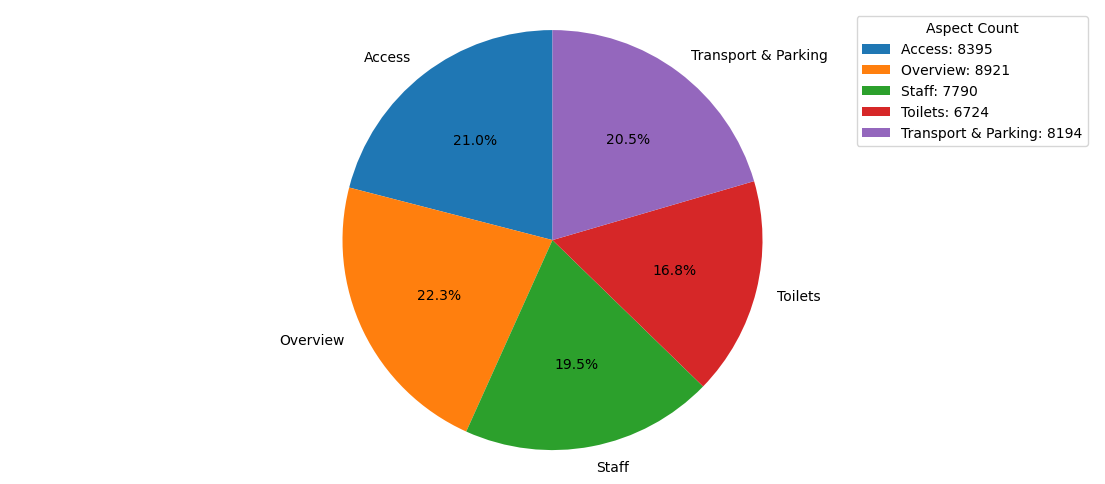

In [ ]:
# Create a pie chart of the aspect counts
fig, ax = plt.subplots(figsize=(14, 6))
labels = amount_per_aspect.index
sizes = amount_per_aspect.values
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Add a legend with the aspect counts
legend_labels = [f"{label}: {size}" for label, size in zip(labels, sizes)]
ax.legend(legend_labels, title="Aspect Count", loc="best")

# Set the file path to save the plot to
aspects_file_path = homepath + "reports/figures/euans_aspects_amounts_piechart_with_stats.png"

# Save the plot to the file path
plt.savefig(aspects_file_path, bbox_inches='tight')

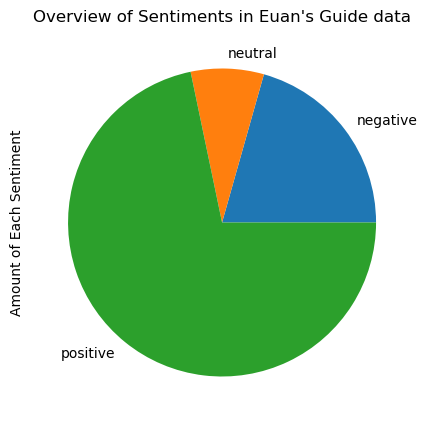

In [45]:
amount_per_sentiment = euans_data.groupby(['Sentiment']).count()
amount_per_sentiment = amount_per_sentiment['Text']
plot = amount_per_sentiment.plot(kind='pie', title="Overview of Sentiments in Euan's Guide data", ylabel='Amount of Each Sentiment', xlabel='Sentiment Types', figsize=(6,5))

# Set the file path to save the plot to
sentiment_file_path = homepath +"/reports/figures/euans_sentiment_count.png"

# Save the plot to the file path
plot.get_figure().savefig(sentiment_file_path)


#### Next, I will do some topic modelling with the Google Reviews data, because this data is not labelled in respect to the matching aspects in Euans Guide. 

#### This will help us investigate what common topics exist in this data so that when I perform my labelling experiment. I know what categories are over-represented and under-represented in my sample.

In [ ]:
import pandas as pd
import os
import nltk
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt') 

home_path = os.getenv('LOCAL_ENV')
google_reviews = pd.read_csv(home_path + '/data/processed/experiments/full_sample_good_reviews.csv')

[nltk_data] Downloading package punkt to /Users/mylene/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


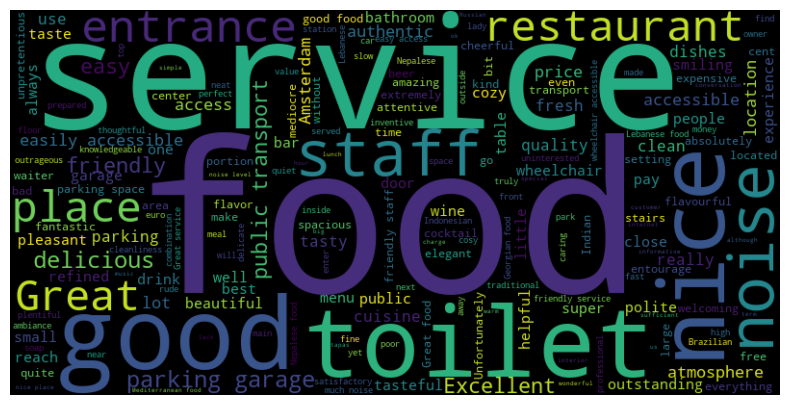

In [ ]:
# Combine all the text from the 'text' column into a single string
text_data = ' '.join(google_reviews['Sentences'].values)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
processed_google_reviews = pd.read_csv(home_path + '/data/processed/aspect_classification_data/processed_google_sample_reviews.csv')  

In [ ]:
processed_google_reviews['Aspect']

0                  ['Overview']
1       ['Transport & Parking']
2                    ['Access']
3       ['Transport & Parking']
4       ['Transport & Parking']
                 ...           
2253               ['Overview']
2254               ['Overview']
2255                  ['Staff']
2256               ['Overview']
2257               ['Overview']
Name: Aspect, Length: 2258, dtype: object

Counter({'Overview': 1299, 'Access': 377, 'Staff': 348, 'Transport & Parking': 329, 'Toilets': 180})


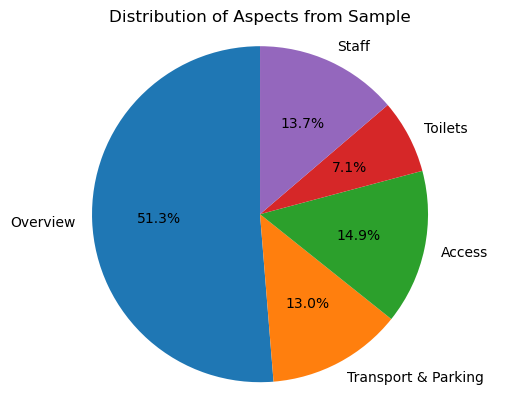

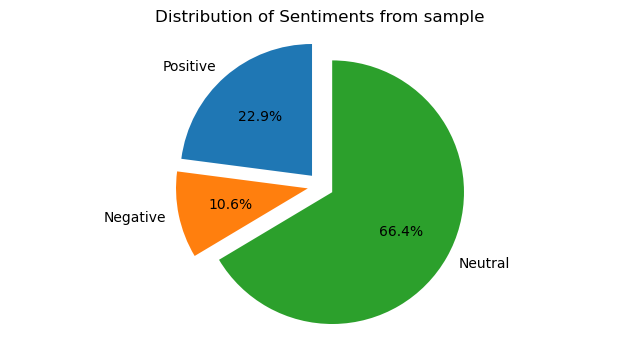

In [ ]:
from collections import Counter

aspects = ['Transport & Parking', 'Toilets', 'Staff', 'Overview', 'Access']

aspect_count = Counter()

processed_google_reviews['Aspect'].apply(lambda x: aspect_count.update([aspect for aspect in aspects if aspect in x]))

print(aspect_count)

# Extract the aspect names and counts from the aspect count dictionary
aspect_names = list(aspect_count.keys())
aspect_counts = list(aspect_count.values())

# Create a pie chart
plt.pie(aspect_counts, labels=aspect_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Aspects from Sample')
plt.show()

# Group the DataFrame by 'Sentiment' and count the occurrences
sentiment_data = processed_google_reviews.groupby('Sentiment').size().reset_index(name='count')

# Create the sentiment pie chart
labels_sentiment = ['Positive', 'Negative', 'Neutral']
sizes_sentiment = sentiment_data['count']
explode_sentiment = [0.1] * len(sentiment_data)  # Optional: Specify the 'explode' parameter to highlight a slice

plt.figure(figsize=(8, 4))
plt.pie(sizes_sentiment, labels=labels_sentiment, explode=explode_sentiment, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Sentiments from sample')
plt.show()